In [0]:
import zipfile
with zipfile.ZipFile('OU-IneritialGaitData.zip') as existing_zip:
    existing_zip.extractall("./", pwd='yagigait131015'.encode('cp850','replace'))

In [0]:
with zipfile.ZipFile('OU-IneritialGaitActionDataset.zip') as existing_zip:
    existing_zip.extractall("./", pwd='OU-2015-sept-10'.encode('cp850','replace'))

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold

In [0]:
os.listdir()

['.config',
 '1dConvBLSTM_fold0.h5',
 'LeftSensor',
 'TestDataset.zip',
 'toPredictionForm.csv',
 'result_gender.png',
 '1dConvBLSTM_fold2.h5',
 'ManualExtractionData',
 'IDGenderAgelist_ig.csv',
 'CleanedData.zip',
 'Distribution.png',
 'OU-IneritialGaitActionDataset.zip',
 'CenterSensor',
 'data',
 '1dConvBLSTM_fold4.h5',
 'AutomaticExtractionData_IMUZCenter',
 '1dConvBLSTM_fold1.h5',
 'Prediction_no_preprocess.csv',
 'Submission.csv',
 'Distribution of age .png',
 'Prediction_cleaned.csv',
 'Distribution of age.png',
 'result_age_2.png',
 'Submission_cleaned.csv',
 'RightSensor',
 'OU-IneritialGaitData.zip',
 'PaperProtocol',
 'CleanedData',
 '1dConvBLSTM_fold3.h5',
 'adc.json',
 'Protocols',
 'sample_data']

In [0]:
def file_name(file_dir): 
    dic={}
    for root, dirs, files in os.walk(file_dir):
        dic[root]=files
#         print(root) #path
#         print(dirs) #subdirectory
#         print(files) #files in non-subdirectory
    return dic

In [0]:
AutomaticExtractionData=file_name("./AutomaticExtractionData_IMUZCenter")
ManualExtractionData=file_name("./ManualExtractionData")
ManualExtractionData_name= list(ManualExtractionData.keys())[1:]
SimilarAction_left = file_name("./LeftSensor")
SimilarAction_right = file_name("./RightSensor")
SimilarAction_center = file_name("./CenterSensor")
label=pd.read_csv('./IDGenderAgelist_ig.csv',dtype='object')

In [0]:
def change_ID_number(x):
    if len(x)==3:
        return ('000' + x)
    elif len(x)==4:
        return ('00' + x)
    elif len(x)==5:
        return ('0' + x)
    else:
        return x
      
label['adjusted_ID']=label['ID'].apply(lambda x: change_ID_number(x))
def file_name_with_ID(x,post,ls):
    for i in range(len(list(ls))):
        if (x == ls[i][5:11] and ls[i][12:]== post):
            return(ls[i])

In [0]:
label['AutomaticExtractionData_IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq0.csv',list(AutomaticExtractionData.values())[0]))
label['AutomaticExtractionData_IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq1.csv',list(AutomaticExtractionData.values())[0]))
label['ManualExtractionData/IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZRight_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZLeft_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/Android_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionDataAndroid_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['SimilarActionLeftSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',list(SimilarAction_left.values())[0]))
label['SimilarActionRightSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',list(SimilarAction_right.values())[0]))
label['SimilarActionCenterSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',list(SimilarAction_center.values())[0]))

In [0]:
label.head()

,ID,Gender(0:Female;1:Male),Age,adjusted_ID,AutomaticExtractionData_IMUZCenter_Walk_1,AutomaticExtractionData_IMUZCenter_Walk_2,ManualExtractionData/IMUZCenter_Walk_1,ManualExtractionData/IMUZCenter_Walk_2,ManualExtractionData/IMUZCenter_SlopeDown,ManualExtractionData/IMUZCenter_SlopeUp,...,ManualExtractionData/IMUZLeft_Walk_2,ManualExtractionData/IMUZLeft_SlopeDown,ManualExtractionData/IMUZLeft_SlopeUp,ManualExtractionData/Android_Walk_1,ManualExtractionData/Android_Walk_2,ManualExtractionData/Android_SlopeDown,ManualExtractionDataAndroid_SlopeUp,SimilarActionLeftSensor,SimilarActionRightSensor,SimilarActionCenterSensor
0,000104,1,33,000104,T0_ID000104_Center_seq0.csv,T0_ID000104_Center_seq1.csv,T0_ID000104_Walk1.csv,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,...,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,T0_ID000104_Walk1.csv,T0_ID000104_Walk2.csv,T0_ID000104_SlopeDown.csv,T0_ID000104_SlopeUp.csv,T0_Id000104.actLabel,T0_Id000104.actLabel,T0_Id000104.actLabel
1,002318,0,11,002318,T0_ID002318_Center_seq0.csv,T0_ID002318_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,002422,1,9,002422,T0_ID002422_Center_seq0.csv,T0_ID002422_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,002526,0,45,002526,T0_ID002526_Center_seq0.csv,T0_ID002526_Center_seq1.csv,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,002630,0,37,002630,T0_ID002630_Center_seq0.csv,T0_ID002630_Center_seq1.csv,T0_ID002630_Walk1.csv,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,...,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,T0_ID002630_Walk1.csv,T0_ID002630_Walk2.csv,T0_ID002630_SlopeDown.csv,T0_ID002630_SlopeUp.csv,T0_Id002630.actLabel,T0_Id002630.actLabel,T0_Id002630.actLabel


In [0]:
def generate_read_table(fileName,actionName,ID,label): 
  #try:
    dataset_name= fileName + actionName
    path_name= fileName +'/'+ str(label[label['ID']==ID][dataset_name].values[0])
    if fileName=='ManualExtractionData/Android':
      df=pd.read_csv(path_name,skiprows=2)
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    elif fileName == "SimilarAction":
      df=pd.read_table(actionName + "/" + str(label[label['ID']==ID][dataset_name].values[0]) ,skiprows=1)
      return df
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    else:
      df=pd.read_csv(path_name,skiprows=2)
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df = df.astype(float)
    return df
  #except:
    #return None
df = generate_read_table( 'AutomaticExtractionData_IMUZCenter','_Walk_1','002318',label)

In [0]:
df.head()

,Gx,Gy,Gz,Ax,Ay,Az
0,0.236353,-0.627744,0.041949,-0.024,-0.826,0.150
0,0.177763,-0.622424,-0.053925,0.006,-0.834,0.148
1,0.044605,-0.638404,-0.181756,0.028,-0.824,0.148
2,-0.045942,-0.670364,-0.309588,0.040,-0.822,0.084
3,-0.056595,-0.643724,-0.384157,0.060,-0.844,0.026


In [0]:
os.listdir()

['.config',
 '1dConvBLSTM_fold0.h5',
 'LeftSensor',
 'TestDataset.zip',
 'toPredictionForm.csv',
 'result_gender.png',
 '1dConvBLSTM_fold2.h5',
 'ManualExtractionData',
 'IDGenderAgelist_ig.csv',
 'CleanedData.zip',
 'Distribution.png',
 'OU-IneritialGaitActionDataset.zip',
 'CenterSensor',
 'data',
 '1dConvBLSTM_fold4.h5',
 'AutomaticExtractionData_IMUZCenter',
 '1dConvBLSTM_fold1.h5',
 'Prediction_no_preprocess.csv',
 'Submission.csv',
 'Distribution of age .png',
 'Prediction_cleaned.csv',
 'Distribution of age.png',
 'result_age_2.png',
 'Submission_cleaned.csv',
 'RightSensor',
 'OU-IneritialGaitData.zip',
 'PaperProtocol',
 'CleanedData',
 '1dConvBLSTM_fold3.h5',
 'adc.json',
 'Protocols',
 'sample_data']

In [0]:
df = generate_read_table('SimilarAction','LeftSensor','000104',label)

In [0]:
df.head()

,Gx,Gy,Gz,Ax,Ay,Az,Label
0,-0.024172,-0.454651,0.173332,0.052,-0.770,-0.138,0
1,-0.018845,-0.433345,0.168006,0.072,-0.766,-0.142,0
2,0.018439,-0.428019,0.157353,0.110,-0.758,-0.138,0
3,0.002460,-0.348124,0.104090,0.130,-0.760,-0.134,0
4,0.055723,-0.273556,0.072132,0.150,-0.780,-0.122,0


In [0]:
import random
import math

def yipeng_preprocessing(raw_data, length):
            
  # Data augmentation
  if raw_data.shape[0] > length:
    #data = raw_data[0:length] # Cut the data
    start_index = random.randrange(len(raw_data) - (length))
    data = raw_data[start_index: start_index + length]
  else:
    period = math.ceil(length / raw_data.shape[0])
    temp = np.copy(raw_data)
    # copy the data periodic
    for i in range(period-1):
      temp = np.row_stack((temp, raw_data))
      data = (temp[0:length]) # Cut the data
            
  return data

In [0]:
import copy

df = pd.read_csv('./IDGenderAgelist_ig.csv')
ids = df["ID"].values
gender = df["Gender(0:Female;1:Male)"].values
age = copy.deepcopy(df["Age"].values)
act_age = df["Age"].values

In [0]:
from keras.utils.np_utils import to_categorical
#for i in range(0,40):
#    age[(age > (i * 2.5)) & (age <= ((i + 1) * 2.5))] = i
#for i in range(0,20):
#    age[(age > (i * 5.0)) & (age <= ((i + 1) * 5.0))] = i
for i in range(0,10):
    age[(age > (i * 10.0)) & (age <= ((i + 1) * 10.0))] = i

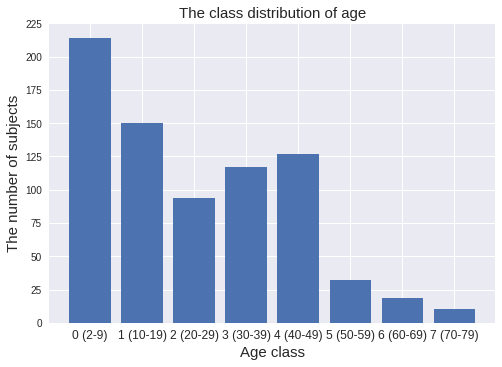

In [0]:
#plt.hist(age,bins = 32)
#plt.hist(age,bins = 16)
#plt.hist(age,bins = 8, align= "center")
labels, counts = np.unique(age, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel("Age class", fontsize = 15)
plt.ylabel("The number of subjects", fontsize = 15)
plt.xticks([0,1,2,3,4,5,6,7],["0 (2-9)", "1 (10-19)", "2 (20-29)", "3 (30-39)",
                              "4 (40-49)","5 (50-59)","6 (60-69)","7 (70-79)"], fontsize = 12)
plt.title("The class distribution of age", fontsize = 15)
plt.savefig("Distribution.png")

In [0]:
to_categorical(age).shape

(763, 8)

In [0]:
df.head()

,ID,Gender(0:Female;1:Male),Age
0,104,1,33
1,2318,0,11
2,2422,1,9
3,2526,0,45
4,2630,0,37


In [1]:
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, Bidirectional, Dropout, Flatten, Dense, TimeDistributed, GlobalMaxPooling1D, Conv2D, Reshape, Activation, Add, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D, AveragePooling1D
from keras.losses import categorical_crossentropy, binary_crossentropy, mae
from keras.layers.merge import concatenate
from keras.optimizers import SGD

#Deep Convoluional LSTM model

def get_model(n_timesteps):
    
  inputs_acel = Input(shape=(n_timesteps,3,))
  x1 = Conv1D(256, 11, padding='same', activation='relu')(inputs_acel)
  x1 = BatchNormalization()(x1)
  x1 = MaxPooling1D(2, padding='same')(x1)
  
  inputs_gylo = Input(shape=(n_timesteps,3,))
  x2 = Conv1D(256, 11, padding='same', activation='relu')(inputs_gylo)
  x2 = BatchNormalization()(x2)
  x2 = MaxPooling1D(2, padding='same')(x2)

  x = concatenate([x1, x2])

  x = Conv1D(256, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(128, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv1D(64, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Bidirectional(LSTM(100,return_sequences=True))(x)
  x = Bidirectional(LSTM(100))(x)
  x = Dropout(0.5)(x)
  
  x_gender = Dense(100, activation='relu')(x)
  gender = Dense(1, activation='sigmoid',name='gender')(x_gender)
  
  x_age = Dense(100, activation='relu')(x)
  age = Dense(8, activation='softmax',name='age')(x_age)
    
  inputs = [inputs_acel, inputs_gylo]
  outputs = [gender, age]
  
  model = Model(inputs=inputs, outputs = outputs)
  sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  model.compile(loss={'gender': binary_crossentropy, 'age': categorical_crossentropy},
                  loss_weights={'gender': 0.50, 'age': 0.50},
                optimizer= "adam", metrics=['accuracy'])
  return model 


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


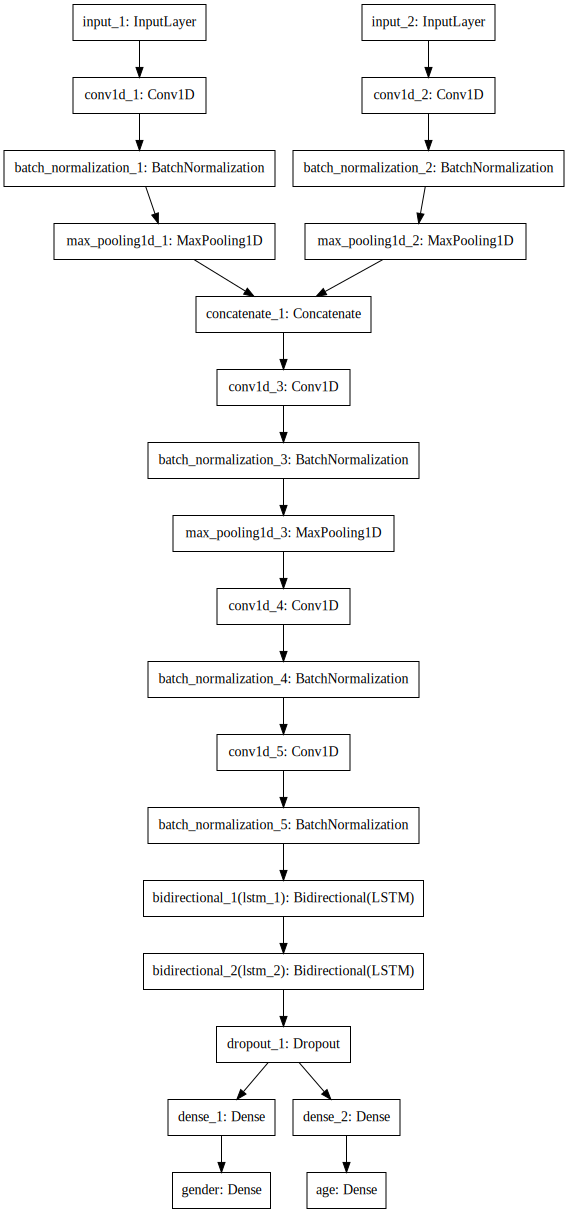

In [2]:
from keras.utils.vis_utils import model_to_dot 
from IPython.display import SVG

model = get_model(100)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 3)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 100, 3)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 100, 256)     8704        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 100, 256)     8704        input_2[0][0]                    
__________________________________________________________________________________________________
batch_norm

In [0]:
def get_max(y_pred):
    for i in range(len(y_pred)):
        temp = y_pred[i]
        temp[np.argmax(temp)] = 1
        temp[temp != 1] = 0
        y_pred[i] = temp
    return y_pred

In [0]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.preprocessing import StandardScaler
import gc

ls_acc = []
ls_mae_2 = []

length = 100
overlap = 50

datasets = label.columns[4:]
file_name=['AutomaticExtractionData_IMUZCenter','ManualExtractionData/IMUZCenter','ManualExtractionData/IMUZRight',
          'ManualExtractionData/IMUZLeft','ManualExtractionData/Android']
action_name=['_Walk_1','_Walk_2','_SlopeDown','_SlopeUp']
sensor_loc = ["CenterSensor", "RightSensor", "LeftSensor"]
skf = StratifiedKFold(n_splits = 5)
s = 0

for train_index, test_index in skf.split(ids, gender):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    ids_train, ids_valid = ids[train_index], ids[test_index]
    gender_train, gender_valid = gender[train_index], gender[test_index]
    age_dummy = to_categorical(age)
    age_train, age_valid = age_dummy[train_index], age_dummy[test_index]
    _, act_age_valid = act_age[train_index], act_age[test_index]
    
    
    
    x_train = []
    new_y_train = []
    new_gender_train = []
    new_age_train = []
    for i in tqdm(range(0,len(ids_train))):
        subject_id = change_ID_number(str(ids_train[i]))
        for k in range(0,len(file_name) - 1):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    start_index = 0
                    if(start_index + length < len(df_subject)):
                        while(start_index + length < len(df_subject)):
                            temp_x = df_subject.values[start_index:start_index + length]
                            x_train.append(temp_x)
                            new_gender_train.append(gender_train[i])
                            new_age_train.append(age_train[i])
                            start_index += (length - overlap)
                    else:
                        df_subject = generate_read_table(path_name,file_name[k], action_name[l],subject_id,label)
                        sc = StandardScaler()
                        df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                        temp_x = yipeng_preprocessing(df_subject.values, length)
                        x_train.append(temp_x)
                        new_gender_train.append(gender_train[i])
                        new_age_train.append(age_train[i])
                except: 
                    continue
                
        for k in range(0,3):
            try:
                df_subject = generate_read_table('SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index :start_index  + length]
                    x_train.append(temp_x)
                    new_gender_train.append(gender_train[i])
                    new_age_train.append(age_train[i])
                    start_index += (length - overlap)
            except: 
                continue
            
    x_valid = []
    new_gender_valid = []
    new_age_valid = []
    new_act_age_valid = []
    gender_valid_for_eval = []
    ls_count = []
    
    for i in tqdm(range(0,len(ids_valid))):
        subject_id = change_ID_number(str(ids_valid[i]))
        for k in range(0,3):
            try:
                df_subject = generate_read_table('SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                c = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index:start_index + length]
                    x_valid.append(temp_x)
                    start_index += (length - overlap)
                    c += 1
                    new_gender_valid.append(gender_valid[i])
                    
                    new_age_valid.append(age_valid[i])
                ls_count.append(c)
                gender_valid_for_eval.append(gender_valid[i])
                new_act_age_valid.append(act_age_valid[i])
            except:
                continue
           
            
    print("Train size: " + str(len(x_train)))
    print("Valid size: " + str(len(x_valid)))
    x_train = np.array(x_train)
    x_valid = np.array(x_valid)
    gender_train = np.array(new_gender_train)
    gender_valid = np.array(new_gender_valid)
    gender_valid_for_eval = np.array(gender_valid_for_eval)
    age_train = np.array(new_age_train)
    age_valid = np.array(new_age_valid)
    act_age_valid = np.array(new_act_age_valid)
        
    
    del new_gender_train, new_gender_valid, new_age_train, new_age_valid, new_act_age_valid
    gc.collect()
    
    model = get_model(x_train.shape[1])
    result = model.fit([x_train[:,:,:3],x_train[:,:,3:]], [gender_train, age_train,],
                       validation_data = ([x_valid[:,:,:3],x_valid[:,:,3:]],[gender_valid, age_valid])
                       ,epochs= 5, batch_size = 256)
    y_pred = model.predict([x_valid[:,:,:3],x_valid[:,:,3:]])
    
    gender_pred = []
    age_pred = []
    c = 0
    for i in range(len(ls_count)):
        gender_pred.append(y_pred[0][c:c + ls_count[i]].mean())
        c += ls_count[i]
    gender_pred = np.array(gender_pred)
    
    gender_pred[gender_pred < 0.5] = 0
    gender_pred[gender_pred >= 0.5] = 1
    print(accuracy_score(gender_pred,gender_valid_for_eval))
    ls_acc.append(accuracy_score(gender_pred,gender_valid_for_eval))
    
    age_pred = []
    c = 0
    for i in range(len(ls_count)):
            max_pred = np.max(y_pred[1][c:c + ls_count[i]],axis = 1)
            dict_pred_age = {}
            for j in range(0,len(max_pred)):
                dict_pred_age[max_pred[j]] = j
            max_pred = np.array(sorted(max_pred,reverse=True))
            max_pred = max_pred[max_pred > 0.50]

            age_high_conf = []
            for j in range(0,len(max_pred)):
                age_high_conf.append(dict_pred_age[max_pred[j]])
            age_high_conf = np.array(age_high_conf)
            temp = y_pred[1][c:c + ls_count[i]]
            mean_age = np.mean(np.sum(np.array(temp[age_high_conf])
                                                  * (np.array(list(range(0,8))) * 10.0 + 5.0), axis = 1))
            age_pred.append(mean_age)
            c += ls_count[i]
    age_pred = np.array(age_pred)
    print(np.mean(abs(act_age_valid - age_pred)))
    ls_mae_2.append(np.mean(abs(act_age_valid - age_pred)))
    
    #model.save("1dConvBLSTM_fold"+ str(s) + ".h5")   
    s += 1
    
    K.clear_session()

  0%|          | 1/610 [00:00<01:07,  8.99it/s]

TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 47.40it/s]


Train size: 120491
Valid size: 20079
Train on 120491 samples, validate on 20079 samples
Epoch 1/3
120491/120491 [==============================] - 62s 515us/step - loss: 1.0003 - gender_loss: 0.4816 - age_loss: 1.5190 - gender_acc: 0.7634 - age_acc: 0.4353 - val_loss: 1.1462 - val_gender_loss: 0.6677 - val_age_loss: 1.6247 - val_gender_acc: 0.6778 - val_age_acc: 0.3822
Epoch 2/3
120491/120491 [==============================] - 58s 482us/step - loss: 0.6671 - gender_loss: 0.3254 - age_loss: 1.0088 - gender_acc: 0.8516 - age_acc: 0.6257 - val_loss: 1.2238 - val_gender_loss: 0.6360 - val_age_loss: 1.8115 - val_gender_acc: 0.7114 - val_age_acc: 0.3904
Epoch 3/3
120491/120491 [==============================] - 58s 481us/step - loss: 0.4910 - gender_loss: 0.2508 - age_loss: 0.7312 - gender_acc: 0.8883 - age_acc: 0.7319 - val_loss: 1.2433 - val_gender_loss: 0.6689 - val_age_loss: 1.8176 - val_gender_acc: 0.7142 - val_age_acc: 0.4268


  0%|          | 2/610 [00:00<00:38, 15.76it/s]

0.7993079584775087
6.671779977911504
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:02<00:00, 61.75it/s]


Train size: 133434
Valid size: 10422
Train on 133434 samples, validate on 10422 samples
Epoch 1/3
133434/133434 [==============================] - 65s 490us/step - loss: 0.9894 - gender_loss: 0.4925 - age_loss: 1.4863 - gender_acc: 0.7559 - age_acc: 0.4465 - val_loss: 1.0681 - val_gender_loss: 0.5311 - val_age_loss: 1.6052 - val_gender_acc: 0.7465 - val_age_acc: 0.3695
Epoch 2/3
133434/133434 [==============================] - 63s 470us/step - loss: 0.6632 - gender_loss: 0.3399 - age_loss: 0.9865 - gender_acc: 0.8424 - age_acc: 0.6355 - val_loss: 1.2527 - val_gender_loss: 0.5380 - val_age_loss: 1.9673 - val_gender_acc: 0.7689 - val_age_acc: 0.3225
Epoch 3/3
133434/133434 [==============================] - 63s 469us/step - loss: 0.4898 - gender_loss: 0.2658 - age_loss: 0.7138 - gender_acc: 0.8805 - age_acc: 0.7392 - val_loss: 1.3096 - val_gender_loss: 0.5428 - val_age_loss: 2.0763 - val_gender_acc: 0.7777 - val_age_acc: 0.3533


  0%|          | 2/610 [00:00<00:38, 15.85it/s]

0.8866666666666667
6.109944648194556
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 45.14it/s]


Train size: 119601
Valid size: 20565
Train on 119601 samples, validate on 20565 samples
Epoch 1/3
119601/119601 [==============================] - 60s 505us/step - loss: 0.9817 - gender_loss: 0.4952 - age_loss: 1.4681 - gender_acc: 0.7535 - age_acc: 0.4523 - val_loss: 1.2326 - val_gender_loss: 0.5334 - val_age_loss: 1.9318 - val_gender_acc: 0.7350 - val_age_acc: 0.3139
Epoch 2/3
119601/119601 [==============================] - 58s 481us/step - loss: 0.6584 - gender_loss: 0.3416 - age_loss: 0.9751 - gender_acc: 0.8418 - age_acc: 0.6358 - val_loss: 1.3776 - val_gender_loss: 0.5311 - val_age_loss: 2.2241 - val_gender_acc: 0.7547 - val_age_acc: 0.3349
Epoch 3/3
119601/119601 [==============================] - 57s 481us/step - loss: 0.4893 - gender_loss: 0.2661 - age_loss: 0.7125 - gender_acc: 0.8801 - age_acc: 0.7380 - val_loss: 1.4212 - val_gender_loss: 0.5617 - val_age_loss: 2.2807 - val_gender_acc: 0.7565 - val_age_acc: 0.3253


  0%|          | 2/610 [00:00<00:40, 15.18it/s]

0.8591549295774648
8.420958171201509
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:04<00:00, 33.96it/s]


Train size: 111197
Valid size: 27312
Train on 111197 samples, validate on 27312 samples
Epoch 1/3
111197/111197 [==============================] - 57s 517us/step - loss: 1.0057 - gender_loss: 0.5028 - age_loss: 1.5087 - gender_acc: 0.7502 - age_acc: 0.4362 - val_loss: 1.1199 - val_gender_loss: 0.5148 - val_age_loss: 1.7250 - val_gender_acc: 0.7392 - val_age_acc: 0.3577
Epoch 2/3
111197/111197 [==============================] - 55s 491us/step - loss: 0.6796 - gender_loss: 0.3473 - age_loss: 1.0118 - gender_acc: 0.8391 - age_acc: 0.6252 - val_loss: 1.1914 - val_gender_loss: 0.4952 - val_age_loss: 1.8877 - val_gender_acc: 0.7647 - val_age_acc: 0.3653
Epoch 3/3
111197/111197 [==============================] - 54s 490us/step - loss: 0.4983 - gender_loss: 0.2721 - age_loss: 0.7246 - gender_acc: 0.8778 - age_acc: 0.7353 - val_loss: 1.3523 - val_gender_loss: 0.5374 - val_age_loss: 2.1672 - val_gender_acc: 0.7661 - val_age_acc: 0.3649


  0%|          | 1/612 [00:00<01:01,  9.90it/s]

0.8985507246376812
8.107233387192506
TRAIN: 612 TEST: 151


100%|██████████| 151/151 [00:03<00:00, 42.20it/s]


Train size: 115469
Valid size: 23896
Train on 115469 samples, validate on 23896 samples
Epoch 1/3
115469/115469 [==============================] - 59s 508us/step - loss: 1.0080 - gender_loss: 0.5097 - age_loss: 1.5063 - gender_acc: 0.7471 - age_acc: 0.4414 - val_loss: 1.1397 - val_gender_loss: 0.5371 - val_age_loss: 1.7423 - val_gender_acc: 0.7284 - val_age_acc: 0.3429
Epoch 2/3
115469/115469 [==============================] - 56s 487us/step - loss: 0.6789 - gender_loss: 0.3521 - age_loss: 1.0056 - gender_acc: 0.8390 - age_acc: 0.6255 - val_loss: 1.2248 - val_gender_loss: 0.4849 - val_age_loss: 1.9646 - val_gender_acc: 0.7708 - val_age_acc: 0.3766
Epoch 3/3
115469/115469 [==============================] - 56s 486us/step - loss: 0.5014 - gender_loss: 0.2742 - age_loss: 0.7287 - gender_acc: 0.8790 - age_acc: 0.7340 - val_loss: 1.3723 - val_gender_loss: 0.4902 - val_age_loss: 2.2544 - val_gender_acc: 0.7776 - val_age_acc: 0.3791
0.8971428571428571
8.064706804542517


In [0]:
temp = np.argmax(age_train,axis = 1)
for i in range(0,8):
    print(len(temp[temp == i]))

27489
23118
18310
18257
16417
6442
3204
2232


In [0]:
#model = get_model(x_train.shape[1])
#model.load_weights("./1dConvBLSTM_fold0.h5")
#y_pred = model.predict([x_valid[:,:,:3],x_valid[:,:,3:]])

In [0]:
for i in range(0,8):
    print(np.mean(act_age_test[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)]
          - age_pred[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)]))
    print(act_age_test[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)]
          - age_pred[(act_age_test > i * 10) & (act_age_test < (i + 1) * 10)])

NameError: ignored

In [0]:
age_pred = []
c = 0
for i in range(len(ls_count)):
    max_pred = np.max(y_pred[1][c:c + ls_count[i]],axis = 1)
    dict_pred_age = {}
    for j in range(0,len(max_pred)):
        dict_pred_age[max_pred[j]] = j
    max_pred = np.array(sorted(max_pred,reverse=True))
    max_pred = max_pred[max_pred > 0.50]
    
    age_high_conf = []
    for j in range(0,len(max_pred)):
        age_high_conf.append(dict_pred_age[max_pred[j]])
    age_high_conf = np.array(age_high_conf)
    temp = y_pred[1][c:c + ls_count[i]]
    mean_age = np.mean(np.sum(np.array(temp[age_high_conf])
                                          * (np.array(list(range(0,8))) * 10.0 + 5.0), axis = 1))
    age_pred.append(mean_age)
    c += ls_count[i]
age_pred = np.array(age_pred)
print(np.mean(abs(act_age_valid - age_pred)))

8.064706804542517


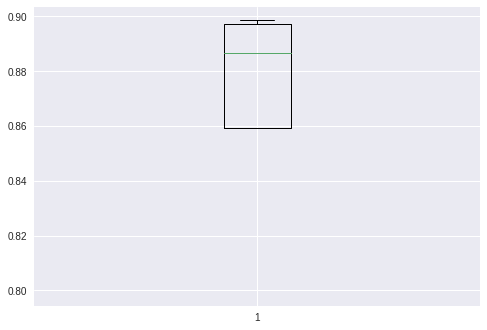

In [0]:
import matplotlib.pyplot as plt
plt.boxplot(ls_acc)
plt.savefig("result_gender")

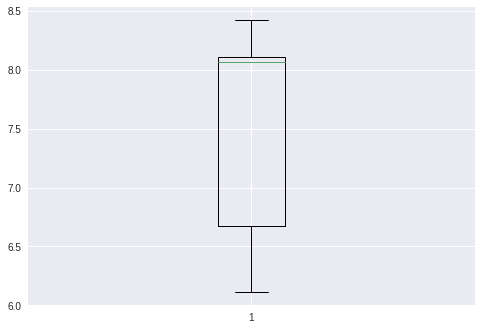

In [0]:
plt.boxplot(ls_mae_2)
plt.savefig("result_age_2")

In [0]:
os.listdir()

['.config',
 'result_age.png',
 'AutomaticExtractionData_IMUZCenter',
 'result_age_2.png',
 'OU-IneritialGaitData.zip',
 'LeftSensor',
 'ManualExtractionData',
 'Protocols',
 'RightSensor',
 'result_gender.png',
 'IDGenderAgelist_ig.csv',
 '1dConvBLSTM_fold4.h5',
 'CenterSensor',
 'PaperProtocol',
 '1dConvBLSTM_fold3.h5',
 '1dConvBLSTM_fold1.h5',
 '1dConvBLSTM_fold2.h5',
 'OU-IneritialGaitActionDataset.zip',
 'adc.json',
 '1dConvBLSTM_fold0.h5',
 'sample_data']

In [0]:
s = 4
upload_file_2 = drive.CreateFile()
upload_file_2.SetContentFile("1dConvBLSTM_fold" + str(s) + ".h5")
upload_file_2.Upload()

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.preprocessing import StandardScaler
import gc

ls_acc = []
ls_mae_2 = []

length = 100
overlap = 50

datasets = label.columns[4:]
file_name=['AutomaticExtractionData_IMUZCenter','ManualExtractionData/IMUZCenter','ManualExtractionData/IMUZRight',
          'ManualExtractionData/IMUZLeft','ManualExtractionData/Android']
action_name=['_Walk_1','_Walk_2','_SlopeDown','_SlopeUp']
sensor_loc = ["CenterSensor", "RightSensor", "LeftSensor"]
skf = StratifiedKFold(n_splits = 5)
s = 0

for train_index, test_index in skf.split(ids, gender):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    _, ids_valid = ids[train_index], ids[test_index]
    _, gender_valid = gender[train_index], gender[test_index]
    age_dummy = to_categorical(age)
    _, age_valid = age_dummy[train_index], age_dummy[test_index]
    _, act_age_valid = act_age[train_index], act_age[test_index]
    
            
    x_valid = []
    new_gender_valid = []
    new_age_valid = []
    new_act_age_valid = []
    gender_valid_for_eval = []
    ls_count = []
    
    for i in tqdm(range(0,len(ids_valid))):
        subject_id = change_ID_number(str(ids_valid[i]))
        for k in range(0,3):
            try:
                df_subject = generate_read_table('SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                c = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index:start_index + length]
                    x_valid.append(temp_x)
                    start_index += (length - overlap)
                    c += 1
                    new_gender_valid.append(gender_valid[i])
                    
                    new_age_valid.append(age_valid[i])
                ls_count.append(c)
                gender_valid_for_eval.append(gender_valid[i])
                new_act_age_valid.append(act_age_valid[i])
            except:
                continue
           
            
    print("Valid size: " + str(len(x_valid)))
    x_valid = np.array(x_valid)
    gender_valid = np.array(new_gender_valid)
    gender_valid_for_eval = np.array(gender_valid_for_eval)
    age_valid = np.array(new_age_valid)
    act_age_valid = np.array(new_act_age_valid)
        
        
    model = get_model(x_valid.shape[1])
    model.load_weights("./1dConvBLSTM_fold" + str(s) + ".h5")
    y_pred = model.predict([x_valid[:,:,:3],x_valid[:,:,3:]])
    
    gender_pred = []
    age_pred = []
    c = 0
    for i in range(len(ls_count)):
        gender_pred.append(y_pred[0][c:c + ls_count[i]].mean())
        c += ls_count[i]
    gender_pred = np.array(gender_pred)
    
    gender_pred[gender_pred < 0.5] = 0
    gender_pred[gender_pred >= 0.5] = 1
    print(accuracy_score(gender_pred,gender_valid_for_eval))
    ls_acc.append(accuracy_score(gender_pred,gender_valid_for_eval))
    
    age_pred = []
    c = 0
    for i in range(len(ls_count)):
            max_pred = np.max(y_pred[1][c:c + ls_count[i]],axis = 1)
            dict_pred_age = {}
            for j in range(0,len(max_pred)):
                dict_pred_age[max_pred[j]] = j
            max_pred = np.array(sorted(max_pred,reverse=True))
            max_pred = max_pred[max_pred > 0.50]

            age_high_conf = []
            for j in range(0,len(max_pred)):
                age_high_conf.append(dict_pred_age[max_pred[j]])
            age_high_conf = np.array(age_high_conf)
            temp = y_pred[1][c:c + ls_count[i]]
            mean_age = np.mean(np.sum(np.array(temp[age_high_conf])
                                                  * (np.array(list(range(0,8))) * 10.0 + 5.0), axis = 1))
            age_pred.append(mean_age)
            c += ls_count[i]
    age_pred = np.array(age_pred)
    print(np.mean(abs(act_age_valid - age_pred)))
    ls_mae_2.append(np.mean(abs(act_age_valid - age_pred)))
    
    s += 1
    
    K.clear_session()

  5%|▍         | 7/153 [00:00<00:02, 60.04it/s]

TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 49.06it/s]


Valid size: 20079


  3%|▎         | 4/153 [00:00<00:04, 34.27it/s]

0.7820069204152249
6.807764617025049
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:02<00:00, 73.13it/s]


Valid size: 10422


  7%|▋         | 10/153 [00:00<00:01, 98.97it/s]

0.8866666666666667
6.056148584772782
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 48.21it/s]


Valid size: 20565


  3%|▎         | 4/153 [00:00<00:04, 35.65it/s]

0.8556338028169014
8.339713660781813
TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:04<00:00, 38.02it/s]


Valid size: 27312


  3%|▎         | 4/151 [00:00<00:04, 36.27it/s]

0.8285024154589372
7.843550683186631
TRAIN: 612 TEST: 151


100%|██████████| 151/151 [00:03<00:00, 48.23it/s]


Valid size: 23896
0.9
7.3700760828446175


In [0]:
from google.colab import files
files.download('Distribution.png')